### Credit card attrition
It is a reduction in credit card users for a company. Most customers of a given business will not remain active customers indefinitely. Whether a one-time purchaser or a loyal customer over many years, every customer will eventually cease his or her relationship with the business. This phenomenon of “disappearing” customers is known by many names, including customer attrition, customer churn, customer turnover, customer cancellation and customer defection.

Successfully predicting customer attrition – and proactively preventing it – represents a huge additional potential revenue source for most businesses.
The rate of customer attrition is a key performance indicator (KPI) that businesses need to track in order to make sure they are making the correct strategic decisions. If new customers don’t stick around for long enough, it could be that some customer acquisition expenditures represent a negative ROI for the company (meaning, they lose money for the company).

#### Models
Logistic Regression, Random Forest and Naive Bayes
#### Inputs (20 Variables)
1. CLIENTNUM: 
Client number. Unique identifier for the customer holding the account

2. Customer_Age: 
Demographic variable - Customer's Age in Years

3. Gender: 
Demographic variable - M=Male, F=Female

4. Dependent_count: 
Demographic variable - Number of dependents

5. Education_Level: 
Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)

6. Marital_Status: 
Demographic variable - Married, Single, Divorced, Unknown

7. Income_Category: 
Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, >)

8. Card_Category: 
Product Variable - Type of Card (Blue, Silver, Gold, Platinum)

9. Months_on_book: 
Period of relationship with bank

10. Total_Relationship_Count
Total no. of products held by the customer

11. Months_Inactive_12_mon
No. of months inactive in the last 12 months

12. Contacts_Count_12_mon
No. of Contacts in the last 12 months

13. Credit_Limit
Credit Limit on the Credit Card

14. Total_Revolving_Bal
Total Revolving Balance on the Credit Card

15. Avg_Open_To_Buy
Open to Buy Credit Line (Average of last 12 months)

16. Total_Amt_Chng_Q4_Q1
Change in Transaction Amount (Q4 over Q1)

17. Total_Trans_Amt
Total Transaction Amount (Last 12 months)

18. Total_Trans_Ct
Total Transaction Count (Last 12 months)

19. Total_Ct_Chng_Q4_Q1
Change in Transaction Count (Q4 over Q1)

20. Avg_Utilization_Ratio
Average Card Utilization Ratio

#### Output: "Attrition_Flag"

Result Summary: 
1. The best model is the Random Forest and the worst model is Naive Bayes due to the highest accuracy among the three models.                
2. Based on the best model_RF, there is a risk of losing 8.9% from existing custmoers.  The reason is that 225 churners are misclassified as existing custmoers which is 8.9% of total 2514 existing customers.

## Data download

In [0]:
%sh
#pip install mlflow
wget http://mydemoapi.s3.us-east-2.amazonaws.com/BankChurners.csv

--2021-12-06 00:09:20--  http://mydemoapi.s3.us-east-2.amazonaws.com/BankChurners.csv
Resolving mydemoapi.s3.us-east-2.amazonaws.com (mydemoapi.s3.us-east-2.amazonaws.com)... 52.219.96.80
Connecting to mydemoapi.s3.us-east-2.amazonaws.com (mydemoapi.s3.us-east-2.amazonaws.com)|52.219.96.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1510880 (1.4M) [text/csv]
Saving to: ‘BankChurners.csv’

     0K .......... .......... .......... .......... ..........  3%  449K 3s
    50K .......... .......... .......... .......... ..........  6%  872K 2s
   100K .......... .......... .......... .......... .......... 10%  926K 2s
   150K .......... .......... .......... .......... .......... 13%  875K 2s
   200K .......... .......... .......... .......... .......... 16%  906K 2s
   250K .......... .......... .......... .......... .......... 20% 1.35M 1s
   300K .......... .......... .......... .......... .......... 23% 2.83M 1s
   350K .......... .......... .......... ......

In [0]:
%sh
ls

BankChurners.csv
conf
eventlogs
logs
metastore_db
preload_class.lst


In [0]:
df = spark.read.csv('file:/databricks/driver/BankChurners.csv', inferSchema=True, header=True)
#df = spark.read.csv('/FileStore/tables/BankChurners.csv', inferSchema=True, header=True, mode='DROPMALFORMED')

In [0]:
display(df)

CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,9.3448E-5,0.99991
818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,5.6861E-5,0.99994
713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.0,2.1081E-5,0.99998
769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.76,1.3366E-4,0.99987
709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.5,0.0,2.1676E-5,0.99998
713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,5.5077E-5,0.99994
810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,1.2303E-4,0.99988
818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,2,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,8.5795E-5,0.99991
710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113,4.4796E-5,0.99996
719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,6,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144,3.0251E-4,0.9997


In [0]:
df=df.drop("Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1")
df=df.drop("Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2")
df=df.dropna()

In [0]:
df.printSchema()

root
 |-- CLIENTNUM: integer (nullable = true)
 |-- Attrition_Flag: string (nullable = true)
 |-- Customer_Age: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Dependent_count: integer (nullable = true)
 |-- Education_Level: string (nullable = true)
 |-- Marital_Status: string (nullable = true)
 |-- Income_Category: string (nullable = true)
 |-- Card_Category: string (nullable = true)
 |-- Months_on_book: integer (nullable = true)
 |-- Total_Relationship_Count: integer (nullable = true)
 |-- Months_Inactive_12_mon: integer (nullable = true)
 |-- Contacts_Count_12_mon: integer (nullable = true)
 |-- Credit_Limit: double (nullable = true)
 |-- Total_Revolving_Bal: integer (nullable = true)
 |-- Avg_Open_To_Buy: double (nullable = true)
 |-- Total_Amt_Chng_Q4_Q1: double (nullable = true)
 |-- Total_Trans_Amt: integer (nullable = true)
 |-- Total_Trans_Ct: integer (nullable = true)
 |-- Total_Ct_Chng_Q4_Q1: double (nullable = true)
 |-- Avg_Utilization_Ratio: double (n

In [0]:
df.count()

Out[9]: 10127

In [0]:
display(df.summary())

summary,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127,10127,10127,10127,10127,10127,10127,10127,10127,10127,10127,10127,10127,10127,10127,10127,10127,10127,10127,10127,10127
mean,7.391776063336625E8,null,46.32596030413745,null,2.3462032191172115,null,null,null,null,35.928409203120374,3.8125802310654686,2.3411671768539546,2.4553174681544387,8631.953698034848,1162.8140614199665,7469.139636614887,0.7599406536980376,4404.086303939963,64.85869457884863,0.7122223758269962,0.2748935518909845
stddev,3.690378345023116E7,null,8.016814032549046,null,1.29890834890379,null,null,null,null,7.98641633087208,1.55440786533883,1.0106223994182844,1.1062251426359249,9088.776650223148,814.9873352357533,9090.685323679114,0.2192067692307027,3397.129253557085,23.47257044923301,0.23808609133294137,0.27569146925238736
min,708082083,Attrited Customer,26,F,0,College,Divorced,$120K +,Blue,13,1,0,0,1438.3,0,3.0,0.0,510,10,0.0,0.0
25%,713032233,null,41,null,1,null,null,null,null,31,3,2,2,2555.0,357,1322.0,0.631,2155,45,0.581,0.022
50%,717924933,null,46,null,2,null,null,null,null,36,4,2,2,4549.0,1276,3472.0,0.736,3899,67,0.702,0.175
75%,773140683,null,52,null,3,null,null,null,null,40,5,3,3,11067.0,1784,9857.0,0.859,4741,81,0.818,0.503
max,828343083,Existing Customer,73,M,5,Unknown,Unknown,Unknown,Silver,56,6,6,6,34516.0,2517,34516.0,3.397,18484,139,3.714,0.999


In [0]:
# convert intenger column into double 
df = df.withColumn('Customer_Age',df['Customer_Age'].cast("double"))
df = df.withColumn('Dependent_count',df['Dependent_count'].cast("double"))
df = df.withColumn('Months_on_book',df['Months_on_book'].cast("double"))
df = df.withColumn('Total_Relationship_Count',df['Total_Relationship_Count'].cast("double"))
df = df.withColumn('Months_Inactive_12_mon',df['Months_Inactive_12_mon'].cast("double"))
df = df.withColumn('Contacts_Count_12_mon',df['Contacts_Count_12_mon'].cast("double"))
df = df.withColumn('Total_Relationship_Count',df['Total_Relationship_Count'].cast("double"))
df = df.withColumn('Total_Revolving_Bal',df['Total_Revolving_Bal'].cast("double"))
df = df.withColumn('Contacts_Count_12_mon',df['Contacts_Count_12_mon'].cast("double"))
df = df.withColumn('Total_Trans_Amt',df['Total_Trans_Amt'].cast("double"))
df = df.withColumn('Total_Trans_Ct',df['Total_Trans_Ct'].cast("double"))

In [0]:
df.dtypes

Out[12]: [('CLIENTNUM', 'int'),
 ('Attrition_Flag', 'string'),
 ('Customer_Age', 'double'),
 ('Gender', 'string'),
 ('Dependent_count', 'double'),
 ('Education_Level', 'string'),
 ('Marital_Status', 'string'),
 ('Income_Category', 'string'),
 ('Card_Category', 'string'),
 ('Months_on_book', 'double'),
 ('Total_Relationship_Count', 'double'),
 ('Months_Inactive_12_mon', 'double'),
 ('Contacts_Count_12_mon', 'double'),
 ('Credit_Limit', 'double'),
 ('Total_Revolving_Bal', 'double'),
 ('Avg_Open_To_Buy', 'double'),
 ('Total_Amt_Chng_Q4_Q1', 'double'),
 ('Total_Trans_Amt', 'double'),
 ('Total_Trans_Ct', 'double'),
 ('Total_Ct_Chng_Q4_Q1', 'double'),
 ('Avg_Utilization_Ratio', 'double')]

In [0]:
#data tansformation 
df.select('Education_Level').groupBy('Education_Level').count().show()
df.select('Income_Category').groupBy('Income_Category').count().show()
df.select('Marital_Status').groupBy('Marital_Status').count().show()
df.select('Card_Category').groupBy('Card_Category').count().show()
df.select('Attrition_Flag').groupBy('Attrition_Flag').count().show()


+---------------+-----+
|Education_Level|count|
+---------------+-----+
|    High School| 2013|
|        Unknown| 1519|
|     Uneducated| 1487|
|  Post-Graduate|  516|
|      Doctorate|  451|
|       Graduate| 3128|
|        College| 1013|
+---------------+-----+

+---------------+-----+
|Income_Category|count|
+---------------+-----+
|        $120K +|  727|
|    $60K - $80K| 1402|
|   $80K - $120K| 1535|
|        Unknown| 1112|
|    $40K - $60K| 1790|
| Less than $40K| 3561|
+---------------+-----+

+--------------+-----+
|Marital_Status|count|
+--------------+-----+
|       Unknown|  749|
|       Married| 4687|
|      Divorced|  748|
|        Single| 3943|
+--------------+-----+

+-------------+-----+
|Card_Category|count|
+-------------+-----+
|     Platinum|   20|
|       Silver|  555|
|         Blue| 9436|
|         Gold|  116|
+-------------+-----+

+-----------------+-----+
|   Attrition_Flag|count|
+-----------------+-----+
|Existing Customer| 8500|
|Attrited Customer| 1627|
+-

In [0]:
df.select('Education_Level').groupBy('Education_Level').count().display()

Education_Level,count
High School,2013
Unknown,1519
Uneducated,1487
Post-Graduate,516
Doctorate,451
Graduate,3128
College,1013


In [0]:
df.select('Marital_Status').groupBy('Marital_Status').count().display()

Marital_Status,count
Unknown,749
Married,4687
Divorced,748
Single,3943


In [0]:
df.select('Attrition_Flag').groupBy('Attrition_Flag').count().display()

Attrition_Flag,count
Existing Customer,8500
Attrited Customer,1627


In [0]:
# Review some categorical features 
df.createOrReplaceTempView ('df')

In [0]:
%sql 
select Income_Category, count(1) as count 
from df 
group by Income_Category 
order by Income_Category desc

Income_Category,count
Unknown,1112
Less than $40K,3561
$80K - $120K,1535
$60K - $80K,1402
$40K - $60K,1790
$120K +,727


In [0]:
%sql 
select Card_Category, count(1) as count 
from df 
group by Card_Category 
order by Card_Category desc

Card_Category,count
Silver,555
Platinum,20
Gold,116
Blue,9436


In [0]:
# Since 93% of Card_Category are blue, this feature will not be included in the predicting features.

/databricks/python/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<AxesSubplot:xlabel='Credit_Limit', ylabel='Density'>

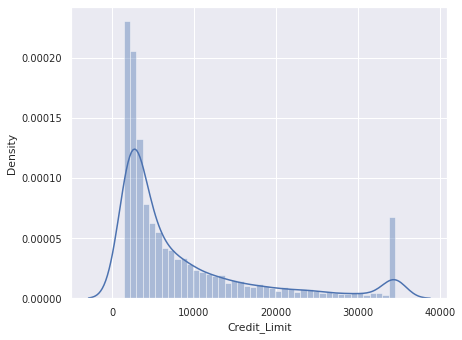

In [0]:
# Review some numerical features distribution 
import matplotlib.pyplot as plt   #Data visualisation libraries 
import seaborn as sns
pdata = df.toPandas()
sns.set(style="darkgrid", font_scale=.9)
fig, ax = plt.subplots()
fig.set_size_inches( 6, 5)
g = sns.distplot(pdata['Credit_Limit'])
display(g)

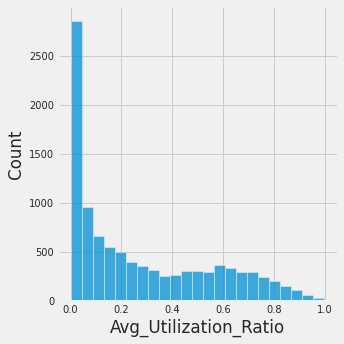

In [0]:
fig.set_size_inches( 7, 7)
g1 = sns.displot(pdata['Avg_Utilization_Ratio'])
display(g1)

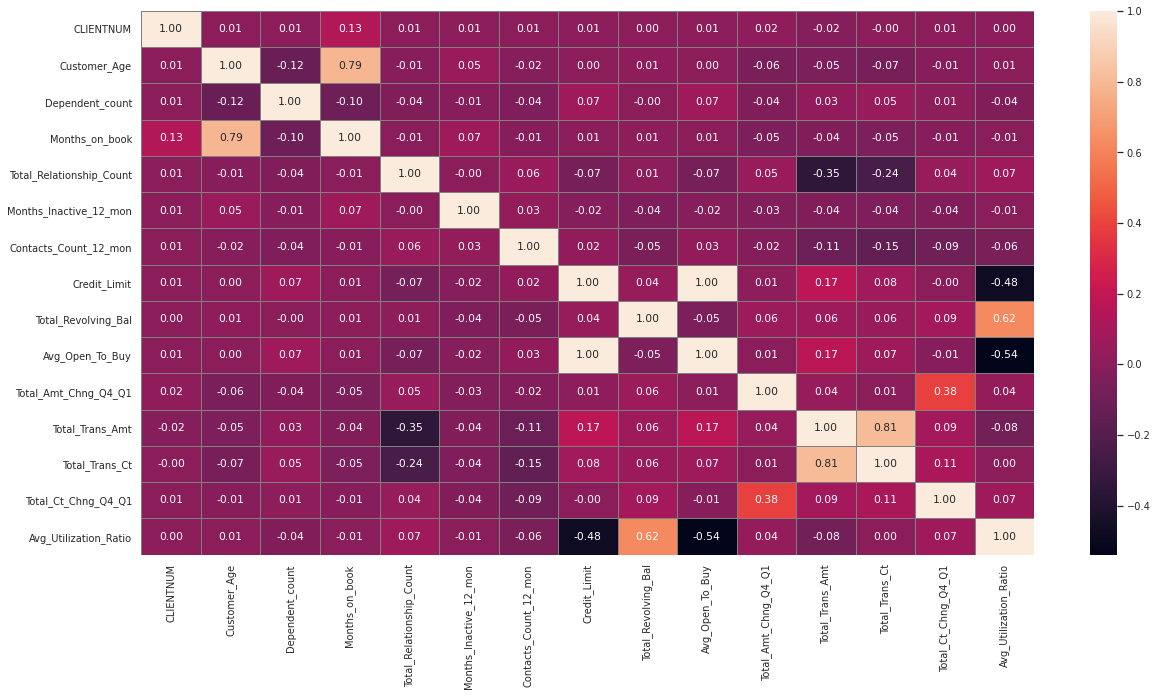

In [0]:
# review the features correlation
df_cor = df.toPandas() 
plt.figure(figsize=(20,10))
sns.heatmap(df_cor.corr(), annot=True, linewidth=.5, fmt='.2f', linecolor = 'grey')
plt.show()

In [0]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer, IndexToString, VectorAssembler
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier, NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml import Pipeline, Model
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder 

In [0]:
stringIndexer_label = StringIndexer(inputCol="Attrition_Flag", outputCol="label").fit(df)  # product_line -> Double
# Note the above outputCol is label (the predicted column). Here we predict the product line (above) from the attributes below.
#stringIndexer_Att_Flag = StringIndexer(inputCol="Attrition_Flag", outputCol="Attrition_Flag_IX")
stringIndexer_gend = StringIndexer(inputCol="Gender", outputCol="GENDER_IX")
stringIndexer_mar = StringIndexer(inputCol="Marital_Status", outputCol="MARITAL_STATUS_IX")
stringIndexer_edu = StringIndexer(inputCol="Education_Level", outputCol="Education_Level_IX")
# stringIndexer_card = StringIndexer(inputCol="Card_Category", outputCol="Card_Category_IX")
stringIndexer_Income = StringIndexer(inputCol="Income_Category", outputCol="Income_Category_IX")

In [0]:
#19 predictors
vectorAssembler_features = VectorAssembler(inputCols=["GENDER_IX", "MARITAL_STATUS_IX", "Education_Level_IX","Income_Category_IX","Credit_Limit","Customer_Age","Dependent_count","Months_on_book",
"Months_Inactive_12_mon","Contacts_Count_12_mon","Total_Relationship_Count","Total_Revolving_Bal","Total_Trans_Amt",                 "Total_Trans_Ct","Avg_Open_To_Buy","Total_Amt_Chng_Q4_Q1","Total_Ct_Chng_Q4_Q1","Avg_Utilization_Ratio",                        "Total_Relationship_Count"], outputCol="features")

In [0]:
# Pipeline basic to be shared across model fitting and testing
pipeline = Pipeline(stages=[])  # Must initialize with empty list!

# base pipeline (the processing here should be reused across pipelines)
basePipeline = [stringIndexer_label, stringIndexer_gend, stringIndexer_mar,stringIndexer_edu, 
                stringIndexer_Income,vectorAssembler_features]
# If the above order changes, then the Word Cloud will fail, unless you update the refrence to the CountVectorizers in variable word_model_idx

In [0]:
#LG, RF, GB, NB models
lr = LogisticRegression()
pl_lr = basePipeline + [lr]
pg_lr = ParamGridBuilder()\
          .baseOn({pipeline.stages: pl_lr})\
          .addGrid(lr.regParam,[0.01, .04])\
          .addGrid(lr.elasticNetParam,[0.1, 0.4])\
          .build()

rf = RandomForestClassifier(numTrees=50)
pl_rf = basePipeline + [rf]
pg_rf = ParamGridBuilder()\
      .baseOn({pipeline.stages: pl_rf})\
      .build()

nb = NaiveBayes()
pl_nb = basePipeline + [nb]
pg_nb = ParamGridBuilder()\
      .baseOn({pipeline.stages: pl_nb})\
      .addGrid(nb.smoothing,[0.4,1.0])\
      .build()

# One grid from the individual grids
# paramGrid = pg_rf # try fewer models for testing (and to complete sooner)
# Two models:
#paramGrid = pg_lr + pg_rf
# All models:
paramGrid = pg_lr + pg_rf + pg_nb

In [0]:
#Split the data
splitted_data = df.randomSplit([0.7, 0.3], 24)# proportions [], seed for random
train_data = splitted_data[0]
test_data = splitted_data[1]
#predict_data = splitted_data[2]
print ("Number of training records: " + str(train_data.count()))
print ("Number of testing records : " + str(test_data.count()))
#print ("Number of prediction records : " + str(predict_data.count()))
display(train_data)

Number of training records: 7083
Number of testing records : 3044


CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
708082083,Existing Customer,45.0,F,3.0,High School,Married,Less than $40K,Blue,36.0,4.0,3.0,3.0,3544.0,1661.0,1883.0,0.831,15149.0,111.0,0.734,0.469
708083283,Attrited Customer,58.0,M,0.0,Unknown,Single,$40K - $60K,Blue,45.0,3.0,1.0,3.0,3421.0,2517.0,904.0,0.992,992.0,21.0,0.4,0.736
708084558,Attrited Customer,46.0,M,3.0,Doctorate,Divorced,$80K - $120K,Blue,38.0,6.0,3.0,3.0,8258.0,1771.0,6487.0,0.0,1447.0,23.0,0.0,0.214
708085458,Existing Customer,34.0,F,2.0,Uneducated,Single,Less than $40K,Blue,24.0,6.0,2.0,2.0,1438.3,0.0,1438.3,0.827,3940.0,82.0,0.952,0.0
708086958,Existing Customer,49.0,F,2.0,Uneducated,Married,Unknown,Blue,41.0,3.0,5.0,2.0,3128.0,749.0,2379.0,0.598,4369.0,59.0,0.735,0.239
708095133,Existing Customer,43.0,M,4.0,Unknown,Unknown,$120K +,Blue,34.0,5.0,2.0,2.0,33304.0,1833.0,31471.0,0.428,1448.0,29.0,0.381,0.055
708098133,Existing Customer,32.0,F,0.0,Graduate,Married,Less than $40K,Blue,19.0,6.0,1.0,0.0,2834.0,1418.0,1416.0,1.458,1598.0,39.0,0.773,0.5
708100533,Existing Customer,55.0,F,3.0,College,Single,Less than $40K,Blue,36.0,3.0,3.0,3.0,2679.0,2277.0,402.0,0.736,4943.0,85.0,0.735,0.85
708104658,Existing Customer,46.0,M,1.0,Graduate,Unknown,$40K - $60K,Blue,36.0,4.0,3.0,2.0,1438.3,890.0,548.3,1.143,2928.0,48.0,1.4,0.619
708108333,Attrited Customer,47.0,F,3.0,Graduate,Married,Unknown,Blue,36.0,3.0,3.0,1.0,5590.0,0.0,5590.0,0.01,1507.0,32.0,0.0,0.0


In [0]:
cv = CrossValidator()\
      .setEstimator(pipeline)\
      .setEvaluator(BinaryClassificationEvaluator())\
      .setEstimatorParamMaps(paramGrid)\
      .setNumFolds(2)

#cvModel = cv.fit(training)
cvModel = cv.fit(train_data)
#cvModel = cv.fit(df) # more than 1 hour for all data (if completes)

/databricks/spark/python/pyspark/ml/util.py:839: UserWarning: Cannot find mlflow module. To enable MLflow logging, install mlflow from PyPI.
  warnings.warn(_MLflowInstrumentation._NO_MLFLOW_WARNING)


In [0]:
#Evaluate models

import numpy as np
# BinaryClassificationEvaluator defaults to ROC AUC, so higher is better
# http://gim.unmc.edu/dxtests/roc3.htm
print("Best Model")
print(cvModel.getEstimatorParamMaps()[ np.argmax(cvModel.avgMetrics) ])
print("Worst Model")
print (cvModel.getEstimatorParamMaps()[ np.argmin(cvModel.avgMetrics) ])

Best Model
{Param(parent='Pipeline_f62def8f9d73', name='stages', doc='a list of pipeline stages'): [StringIndexerModel: uid=StringIndexer_72f6776b09f8, handleInvalid=error, StringIndexer_8a3687f09f62, StringIndexer_bf83f38495b4, StringIndexer_b513332b19ab, StringIndexer_5638ec183906, VectorAssembler_81ea707123e8, RandomForestClassifier_1de9892bc1d2]}
Worst Model
{Param(parent='Pipeline_f62def8f9d73', name='stages', doc='a list of pipeline stages'): [StringIndexerModel: uid=StringIndexer_72f6776b09f8, handleInvalid=error, StringIndexer_8a3687f09f62, StringIndexer_bf83f38495b4, StringIndexer_b513332b19ab, StringIndexer_5638ec183906, VectorAssembler_81ea707123e8, NaiveBayes_f5aa557c09bc], Param(parent='NaiveBayes_f5aa557c09bc', name='smoothing', doc='The smoothing parameter, should be >= 0, default is 1.0'): 0.4}


In [0]:
import re
def paramGrid_model_name(model):
  params = [v for v in model.values() if type(v) is not list]
  name = [v[-1] for v in model.values() if type(v) is list][0]
  name = re.match(r'([a-zA-Z]*)', str(name)).groups()[0]
  return "{}{}".format(name,params)

# Resulting metric and model description
# get the measure from the CrossValidator, cvModel.avgMetrics
# get the model name & params from the paramGrid
# put them together here:
measures = zip(cvModel.avgMetrics, [paramGrid_model_name(m) for m in paramGrid])
metrics,model_names = zip(*measures)

<Figure size 432x288 with 0 Axes>

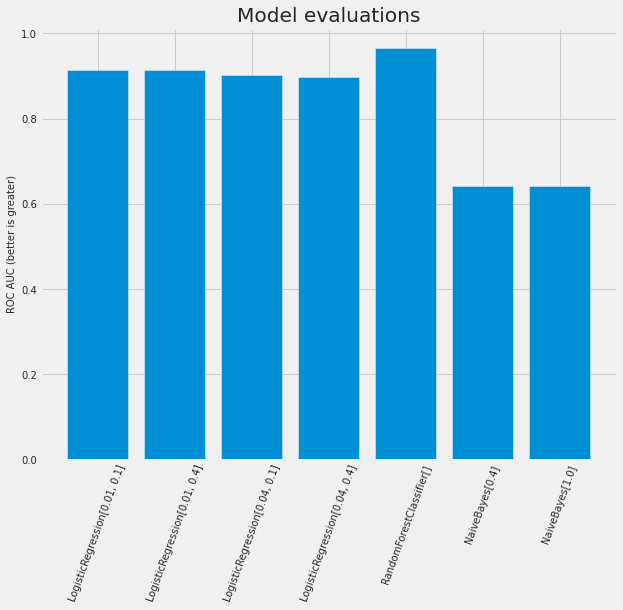

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.clf() # clear figure
fig = plt.figure( figsize=(10, 10))
plt.style.use('fivethirtyeight')
axis = fig.add_axes([0.1, 0.3, 0.8, 0.6])
# plot the metrics as Y
#plt.plot(range(len(model_names)),metrics)
plt.bar(range(len(model_names)),metrics)
# plot the model name & param as X labels
plt.xticks(range(len(model_names)), model_names, rotation=70, fontsize=10)
plt.yticks(fontsize=10)
#plt.xlabel('model',fontsize=8)
plt.ylabel('ROC AUC (better is greater)',fontsize=10)
plt.title('Model evaluations')
display(plt.show())

In [0]:
predictionsDf = cvModel.transform(test_data)
predictionsDf.registerTempTable('Predictions')
display(predictionsDf)

CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,label,GENDER_IX,MARITAL_STATUS_IX,Education_Level_IX,Income_Category_IX,features,rawPrediction,probability,prediction
708099183,Existing Customer,37.0,F,2.0,High School,Single,Less than $40K,Blue,36.0,4.0,2.0,2.0,5723.0,1873.0,3850.0,0.851,2732.0,63.0,0.853,0.327,0.0,0.0,1.0,1.0,0.0,"Map(vectorType -> dense, length -> 19, values -> List(0.0, 1.0, 1.0, 0.0, 5723.0, 37.0, 2.0, 36.0, 2.0, 2.0, 4.0, 1873.0, 2732.0, 63.0, 3850.0, 0.851, 0.853, 0.327, 4.0))","Map(vectorType -> dense, length -> 2, values -> List(47.01493439178998, 2.985065608210016))","Map(vectorType -> dense, length -> 2, values -> List(0.9402986878357997, 0.05970131216420033))",0.0
708103608,Existing Customer,52.0,M,1.0,High School,Single,$60K - $80K,Blue,45.0,1.0,5.0,1.0,11898.0,2517.0,9381.0,0.745,15798.0,128.0,0.73,0.212,0.0,1.0,1.0,1.0,3.0,"Map(vectorType -> dense, length -> 19, values -> List(1.0, 1.0, 1.0, 3.0, 11898.0, 52.0, 1.0, 45.0, 5.0, 1.0, 1.0, 2517.0, 15798.0, 128.0, 9381.0, 0.745, 0.73, 0.212, 1.0))","Map(vectorType -> dense, length -> 2, values -> List(47.440689825597, 2.559310174403019))","Map(vectorType -> dense, length -> 2, values -> List(0.9488137965119396, 0.05118620348806037))",0.0
708113208,Existing Customer,53.0,F,1.0,High School,Married,Less than $40K,Blue,36.0,3.0,2.0,2.0,1688.0,0.0,1688.0,0.641,4375.0,69.0,0.605,0.0,0.0,0.0,0.0,1.0,0.0,"Map(vectorType -> dense, length -> 19, values -> List(0.0, 0.0, 1.0, 0.0, 1688.0, 53.0, 1.0, 36.0, 2.0, 2.0, 3.0, 0.0, 4375.0, 69.0, 1688.0, 0.641, 0.605, 0.0, 3.0))","Map(vectorType -> dense, length -> 2, values -> List(47.640587236917504, 2.359412763082495))","Map(vectorType -> dense, length -> 2, values -> List(0.9528117447383501, 0.047188255261649895))",0.0
708117933,Attrited Customer,44.0,F,2.0,Graduate,Divorced,Less than $40K,Blue,36.0,3.0,2.0,3.0,1880.0,0.0,1880.0,0.519,2469.0,34.0,0.417,0.0,1.0,0.0,3.0,0.0,0.0,"Map(vectorType -> dense, length -> 19, values -> List(0.0, 3.0, 0.0, 0.0, 1880.0, 44.0, 2.0, 36.0, 2.0, 3.0, 3.0, 0.0, 2469.0, 34.0, 1880.0, 0.519, 0.417, 0.0, 3.0))","Map(vectorType -> dense, length -> 2, values -> List(9.805655932785372, 40.19434406721464))","Map(vectorType -> dense, length -> 2, values -> List(0.1961131186557074, 0.8038868813442926))",1.0
708125733,Existing Customer,46.0,F,2.0,College,Divorced,Less than $40K,Blue,36.0,4.0,3.0,1.0,1438.3,0.0,1438.3,0.906,4311.0,77.0,0.833,0.0,0.0,0.0,3.0,4.0,0.0,"Map(vectorType -> dense, length -> 19, values -> List(0.0, 3.0, 4.0, 0.0, 1438.3, 46.0, 2.0, 36.0, 3.0, 1.0, 4.0, 0.0, 4311.0, 77.0, 1438.3, 0.906, 0.833, 0.0, 4.0))","Map(vectorType -> dense, length -> 2, values -> List(47.53923551315279, 2.4607644868472187))","Map(vectorType -> dense, length -> 2, values -> List(0.9507847102630557, 0.04921528973694437))",0.0
708128733,Existing Customer,50.0,F,3.0,Post-Graduate,Single,Unknown,Blue,36.0,5.0,4.0,3.0,1814.0,0.0,1814.0,0.852,5014.0,99.0,0.623,0.0,0.0,0.0,1.0,5.0,4.0,"Map(vectorType -> dense, length -> 19, values -> List(0.0, 1.0, 5.0, 4.0, 1814.0, 50.0, 3.0, 36.0, 4.0, 3.0, 5.0, 0.0, 5014.0, 99.0, 1814.0, 0.852, 0.623, 0.0, 5.0))","Map(vectorType -> dense, length -> 2, values -> List(47.33861732043728, 2.661382679562726))","Map(vectorType -> dense, length -> 2, values -> List(0.9467723464087454, 0.05322765359125451))",0.0
708129933,Existing Customer,45.0,F,4.0,Graduate,Single,Less than $40K,Blue,36.0,5.0,3.0,2.0,2072.0,1544.0,528.0,0.903,4210.0,64.0,0.939,0.745,0.0,0.0,1.0,0.0,0.0,"Map(vectorType -> dense, length -> 19, values -> List(0.0, 1.0, 0.0, 0.0, 2072.0, 45.0, 4.0, 36.0, 3.0, 2.0, 5.0, 1544.0, 4210.0, 64.0, 528.0, 0.903, 0.939, 0.745, 5.0))","Map(vectorType -> dense, length -> 2, v

In [0]:
predictionsDf.createOrReplaceTempView ('predictionsDf')

In [0]:
%sql
select count(Gender), Gender
from predictionsDf
where attrition_flag = "Attrited Customer"
group by Gender

count(Gender),Gender
294,F
237,M


In [0]:
%sql
select customer_age 
from predictionsDf
where attrition_flag = "Attrited Customer"

customer_age
44.0
39.0
38.0
47.0
52.0
49.0
59.0
57.0
41.0
51.0


In [0]:
numSuccesses = predictionsDf.where("(label = 0 AND prediction = 0) OR  (label = 1 AND prediction = 1)").count()
numInspections = predictionsDf.count()

print ("There were", numInspections, "inspections and there were", numSuccesses, "successful predictions")
print ("This is a", str((float(numSuccesses) / float(numInspections)) * 100) + "%", "success rate")

resultDF = sqlContext.createDataFrame([['correct', numSuccesses], ['incorrect', (numInspections-numSuccesses)]], ['metric', 'value'])
display(resultDF)

There were 3044 inspections and there were 2787 successful predictions
This is a 91.55716162943496% success rate


metric,value
correct,2787
incorrect,257


In [0]:
truePositive = int(predictionsDf.where("(label = 1 AND prediction = 1)").count())
trueNegative = int(predictionsDf.where("(label = 0 AND prediction = 0)").count())
falsePositive = int(predictionsDf.where("(label = 0 AND prediction = 1)").count())
falseNegative = int(predictionsDf.where("(label = 1 AND prediction = 0)").count())

print ([['TP', truePositive], ['TN', trueNegative], ['FP', falsePositive], ['FN', falseNegative]])
resultDF = sqlContext.createDataFrame([['TP', truePositive], ['TN', trueNegative], ['FP', falsePositive], ['FN', falseNegative]], ['metric', 'value'])
display(resultDF)

[['TP', 306], ['TN', 2481], ['FP', 32], ['FN', 225]]


metric,value
TP,306
TN,2481
FP,32
FN,225
